In [1]:
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import MaxPool2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import time
import matplotlib.pyplot as plt

In [2]:
ds_train, ds_info = tfds.load('cifar10', split='train', shuffle_files=True, with_info=True)
print(ds_info)

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='C:\\Users\\Ala\\tensorflow_datasets\\cifar10\\3.0.2',
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning m

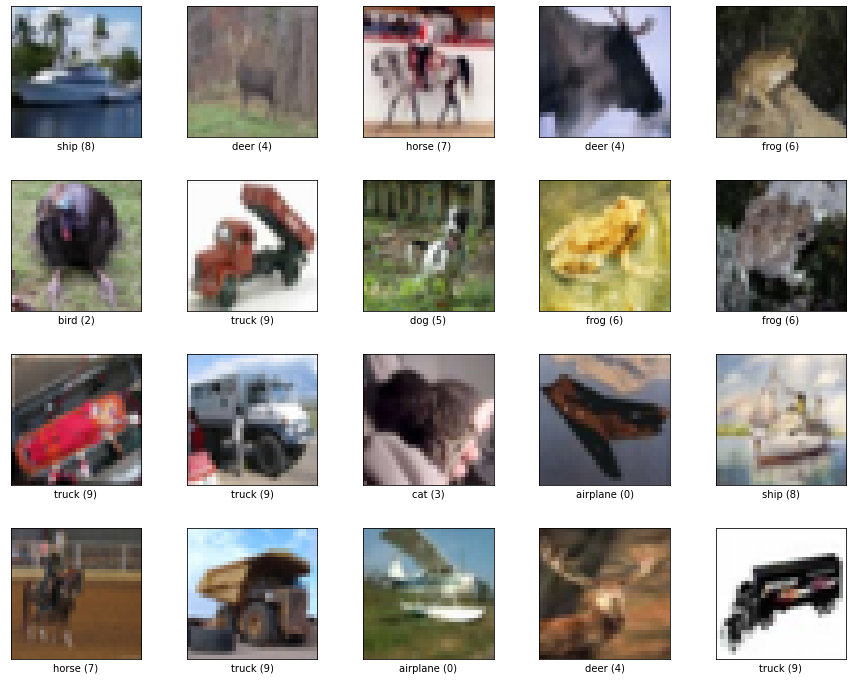

In [3]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=5)

In [4]:
images = []
labels = []

for example in ds_train:  
    images.append(example["image"])
    labels.append(example["label"])

images = np.array(images)
labels = np.array(labels)

In [5]:
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.3, random_state=42)

In [6]:
trainYohe = np.zeros((trainY.size, trainY.max()+1))
trainYohe[np.arange(trainY.size),trainY] = 1
testYohe = np.zeros((testY.size, testY.max()+1))
testYohe[np.arange(testY.size),testY] = 1

In [7]:
model = Sequential(
    [
      Conv2D(filters=8, kernel_size=(4,4), activation='relu', padding='same', input_shape=(32, 32, 3)),
      MaxPool2D(pool_size=(3,3), strides=3),
      Conv2D(filters=16, kernel_size=(4,4), activation='relu', padding='same'),
      MaxPool2D(pool_size=(3,3), strides=3),
      Flatten(),
      Dense(units=10, activation='softmax')
    ]
)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

es_callback = EarlyStopping(monitor='val_loss', verbose=1, patience=5)

start = time.time()

history_stop = model.fit(trainX, trainYohe, callbacks=[es_callback], validation_split=0.3, batch_size=50, epochs=40, verbose=0)

end = time.time()
print('CZAS: ', end - start)

model.evaluate(testX, testYohe, batch_size=32, verbose=2)

Epoch 00036: early stopping
CZAS:  369.7247793674469
469/469 - 3s - loss: 1.4056 - accuracy: 0.5195


[1.4056031703948975, 0.5195333361625671]

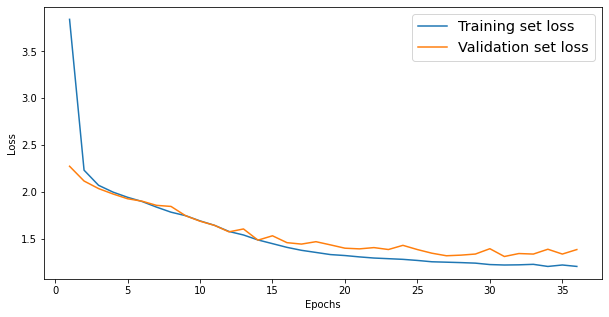

In [8]:
loss = history_stop.history['loss']
val_loss = history_stop.history['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training set loss')
plt.plot(epochs, val_loss, label='Validation set loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize='x-large')

plt.show()